In [1]:
import json

def read_json(file):
    with open(file, 'r') as f:
        data = json.load(f)
    return data


In [2]:
path = '../data/merge_data_language.json'
data = read_json(path)

In [3]:
languages = {}
for key, value in data.items():
    Western_reviews = value['Western_reviews']
    for review in Western_reviews:
        language = review['language']
        if language in languages:
            languages[language] += 1
        else:
            languages[language] = 1

In [4]:
languages

{'en': 16746,
 'no': 1,
 'de': 3341,
 'pt': 161,
 'fr': 480,
 'nl': 19,
 'it': 40,
 'es': 10}

In [5]:
en = []
no = []
de = []
pt = []
fr = []
nl = []
it = []
es = []

de_reviews = []
en_reviews = []
pt_reviews = []
fr_reviews = []
nl_reviews = []
it_reviews = []
es_reviews = []

for key, value in data.items():
    Western_reviews = value['Western_reviews']
    for review in Western_reviews:
        language = review['language']
        len_review = len(review['review'].split())
        if language == 'en':
            en.append(len_review)
        elif language == 'no':
            print(review)
            no.append(len_review)
        elif language == 'de':
            de_reviews.append(review)
            de.append(len_review)
        elif language == 'pt':
            pt.append(len_review)
        elif language == 'fr':
            fr.append(len_review)
        elif language == 'nl':
            nl.append(len_review)
        elif language == 'it':
            it.append(len_review)
        elif language == 'es':
            es.append(len_review)
        
        
        

{'author': 'Wine & Spirits', 'review': 'No tasting note given.', 'rating': 96.0, 'language': 'no'}


In [6]:
cn_reviews = []

for key, value in data.items():
    Chinese_reviews = value['Chinese reviews']
    for review in Chinese_reviews:
        cn_reviews.append(review['review'])

In [7]:

print('en:', sum(en)/len(en), len(en))
print('no:', sum(no)/len(no), len(no))
print('de:', sum(de)/len(de), len(de))
print('pt:', sum(pt)/len(pt), len(pt))
print('fr:', sum(fr)/len(fr), len(fr))
print('nl:', sum(nl)/len(nl), len(nl))
print('it:', sum(it)/len(it), len(it))
print('es:', sum(es)/len(es), len(es))


en: 58.162128269437474 16746
no: 4.0 1
de: 50.73301406764442 3341
pt: 82.15527950310559 161
fr: 135.6375 480
nl: 38.10526315789474 19
it: 44.35 40
es: 114.8 10


In [8]:
de_authors = {}
for review in de_reviews:
    author = review['author']
    if author in de_authors:
        de_authors[author] += 1
    else:
        de_authors[author] = 1

In [9]:
de_authors

{'Vinum Wine Magazine': 557,
 'Falstaff': 1422,
 'Adrian van Velsen - vvWine.ch': 1351,
 nan: 9,
 "Robert Parker's Wine Advocate": 2}

In [10]:
de_reviews[1]

{'author': 'Vinum Wine Magazine',
 'review': 'Er liess es sich nicht nehmen, den in der Schweiz erst seit kurzem erhältlichen Hauptwein der sardischen Kellerei Agricola Punica in Zürich persönlich vorzustellen: Dr. Sebastiano Rosa. Rosa, verantwortlich für die Cantina Santadi und Stiefsohn von Sassicaia-Erfinder Marchese Incisa della Rocchetta, gründete Punica zusammen mit diesem sowie dem Präsidenten von Santadi und dem Önologen Giacomo Tachis im Jahr 2002. Der überwiegend aus Carignano gekelterte Wein duftet nach Pflaumen und Röstaromen und ist im Mund druckvoll und fruchtig.',
 'tasted_time': 'Apr 2011',
 'language': 'de'}

In [11]:
# visualize the embedding of the wine dataset of LaBSE

from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import json

# load the wine dataset

# with open('merge_data_language.json', 'r') as f:
#     data = json.load(f)

de_reviews = []
en_reviews = []
pt_reviews = []
fr_reviews = []
nl_reviews = []
it_reviews = []
es_reviews = []

for key, value in data.items():
    Western_reviews = value['Western_reviews']
    for review in Western_reviews:
        language = review['language']
        review_text = review['review']
        len_review = len(review['review'].split())
        if language == 'en':
            en_reviews.append(review_text)
        elif language == 'no':
            print(review)
        elif language == 'de':
            de_reviews.append(review_text)
        elif language == 'pt':
            pt_reviews.append(review_text)
        elif language == 'fr':
            fr_reviews.append(review_text)
        elif language == 'nl':
            nl_reviews.append(review_text)
        elif language == 'it':
            it_reviews.append(review_text)
        elif language == 'es':
            es_reviews.append(review_text)
        

# load the model



# encode the wine dataset


/Users/ian_ye/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/ian_ye/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Users/ian_ye/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <2A8DB508-8AAF-3FF1-BDFE-9EF17CC2B482> /Users/ian_ye/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


{'author': 'Wine & Spirits', 'review': 'No tasting note given.', 'rating': 96.0, 'language': 'no'}


In [13]:
model = SentenceTransformer('sentence-transformers/LaBSE')

In [5]:
de_embeddings = model.encode(de_reviews, batch_size=64, show_progress_bar=True)
en_embeddings = model.encode(en_reviews, batch_size=64, show_progress_bar=True)
pt_embeddings = model.encode(pt_reviews, batch_size=64, show_progress_bar=True)
fr_embeddings = model.encode(fr_reviews, batch_size=64, show_progress_bar=True)
nl_embeddings = model.encode(nl_reviews, batch_size=64, show_progress_bar=True)
it_embeddings = model.encode(it_reviews, batch_size=64, show_progress_bar=True)
es_embeddings = model.encode(es_reviews, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/53 [00:00<?, ?it/s]

Batches:   0%|          | 0/262 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
cn_embeddings = model.encode(cn_reviews, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/75 [00:00<?, ?it/s]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# create a dataframe with the embeddings
de_centered_embeddings = de_embeddings - np.mean(de_embeddings, axis=0)
en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)
pt_centered_embeddings = pt_embeddings - np.mean(pt_embeddings, axis=0)
fr_centered_embeddings = fr_embeddings - np.mean(fr_embeddings, axis=0)
nl_centered_embeddings = nl_embeddings - np.mean(nl_embeddings, axis=0)
it_centered_embeddings = it_embeddings - np.mean(it_embeddings, axis=0)
es_centered_embeddings = es_embeddings - np.mean(es_embeddings, axis=0)

# random sanple 100  embeddings from each language
de_centered_embeddings = de_centered_embeddings[:100]
en_centered_embeddings = en_centered_embeddings[:100]
pt_centered_embeddings = pt_centered_embeddings[:100]
fr_centered_embeddings = fr_centered_embeddings[:100]
nl_centered_embeddings = nl_centered_embeddings[:100]
it_centered_embeddings = it_centered_embeddings[:100]
es_centered_embeddings = es_centered_embeddings[:100]
# create a dataframe with the embedding

embeddings = np.concatenate([de_centered_embeddings, en_centered_embeddings, pt_centered_embeddings, fr_centered_embeddings, nl_centered_embeddings, it_centered_embeddings, es_centered_embeddings], axis=0)

labels = (["de"] *  len(de_centered_embeddings) +
            ["en"] *  len(en_centered_embeddings) +
            ["pt"] *  len(pt_centered_embeddings) +
            ["fr"] *  len(fr_centered_embeddings) +
            ["nl"] *  len(nl_centered_embeddings) +
            ["it"] *  len(it_centered_embeddings) +
            ["es"] *  len(es_centered_embeddings))

colors = {
    "de": "red",
    "en": "blue",
    "pt": "green",
    "fr": "orange",
    "nl": "purple",
    "it": "brown",
    "es": "pink"
}

# 转成数组方便处理
labels = np.array(labels)

# PCA and t-SNE



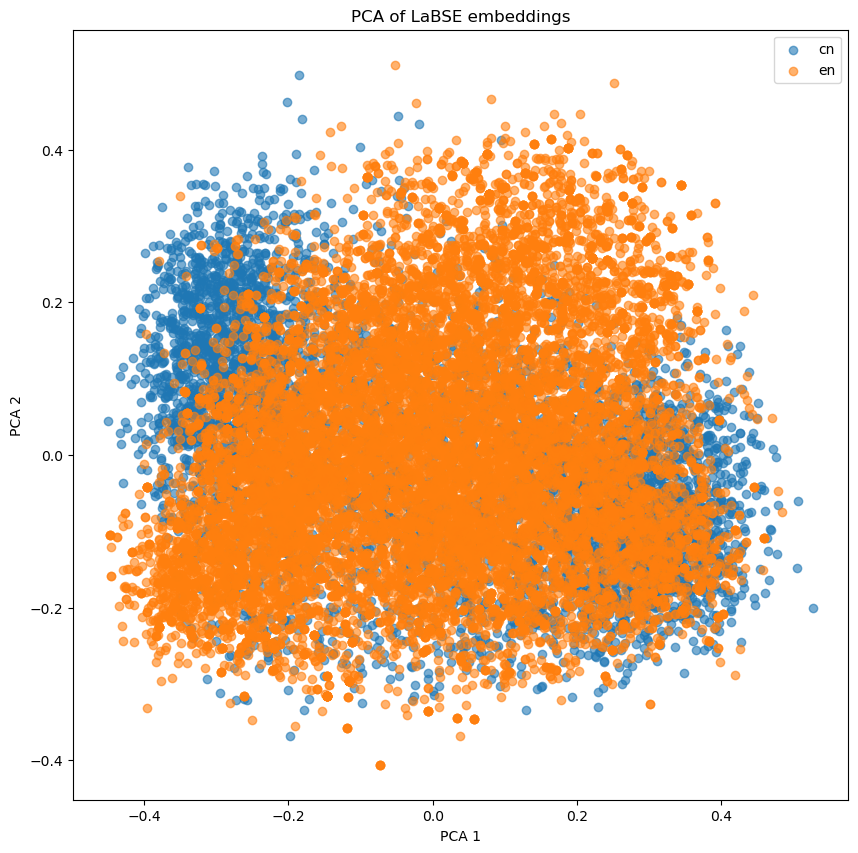

In [30]:
# PCA
from sklearn.decomposition import PCA

en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)
cn_centered_embeddings = cn_embeddings - np.mean(cn_embeddings, axis=0)
# vis cn and en
cn_en_embeddings = np.concatenate([en_centered_embeddings, cn_centered_embeddings], axis=0)
labels = np.array(["en"] * len(en_embeddings) + ["cn"] * len(cn_embeddings))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(cn_en_embeddings)

# plot the PCA
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.6)


plt.title('PCA of LaBSE embeddings')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend()
plt.show()






In [31]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(cn_en_embeddings)

# plot the t-SNE
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], label=label, alpha=0.6)

plt.title('t-SNE of LaBSE embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

# UMAP

# from umap import UMAP
# 
# umap = UMAP(n_components=2, random_state=42)
# umap_result = umap.fit_transform(embeddings)
# 
# # plot the UMAP
# plt.figure(figsize=(10, 10))
# plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels)
# plt.colorbar()
# plt.show()

# t-SNE

AttributeError: 'NoneType' object has no attribute 'split'

In [33]:
cnt = 0

cn_reviews = []
en_reviews = []
for key, value in data.items():
    Western_reviews = value['Western_reviews']
    Chinese_reviews = value['Chinese reviews']
    for review in Chinese_reviews:
        cn_reviews.append(review['review'])
    for review in Western_reviews:
        language = review['language']
        if language == 'en':
            en_reviews.append(review['review'])
    
    cnt += 1
    if cnt > 100:
        break

In [34]:
cn_embeddings = model.encode(cn_reviews, batch_size=64, show_progress_bar=True)
en_embeddings = model.encode(en_reviews, batch_size=64, show_progress_bar=True)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

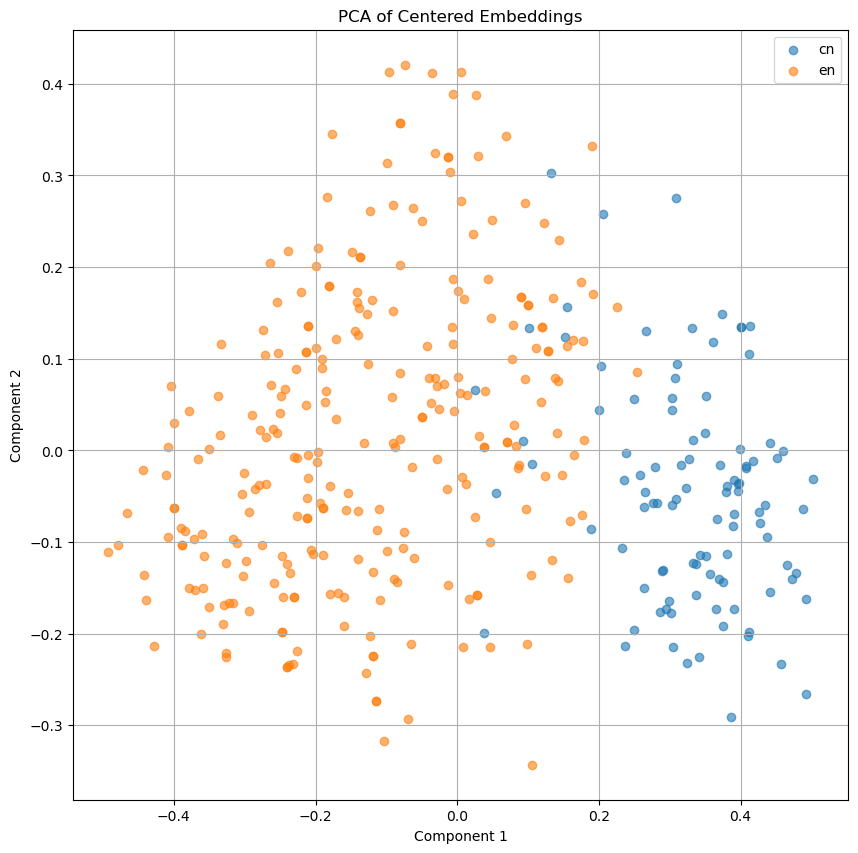

In [55]:
# PCA 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# create a dataframe with the embeddings
cn_centered_embeddings = cn_embeddings - np.mean(cn_embeddings, axis=0)
en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)

# 合并与标签
embeddings = np.concatenate([cn_embeddings, en_embeddings], axis=0)
labels = np.array(["cn"] * len(cn_centered_embeddings) + ["en"] * len(en_centered_embeddings))

# 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# 可视化
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.6)

plt.title("PCA of Centered Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
cnt = 0

cn_reviews = []
en_reviews = []
for key, value in data.items():
    Western_reviews = value['Western_reviews']
    Chinese_reviews = value['Chinese reviews']
    for review in Chinese_reviews:
        if review['English review'] != None:
            cn_reviews.append(review['English review'])
    for review in Western_reviews:
        language = review['language']
        if language == 'en':
            en_reviews.append(review['review'])
    
    # cnt += 1
    # if cnt > 100:
    #     break

In [57]:
cn_embeddings = model.encode(cn_reviews, batch_size=64, show_progress_bar=True)
en_embeddings = model.encode(en_reviews, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

Batches:   0%|          | 0/262 [00:00<?, ?it/s]

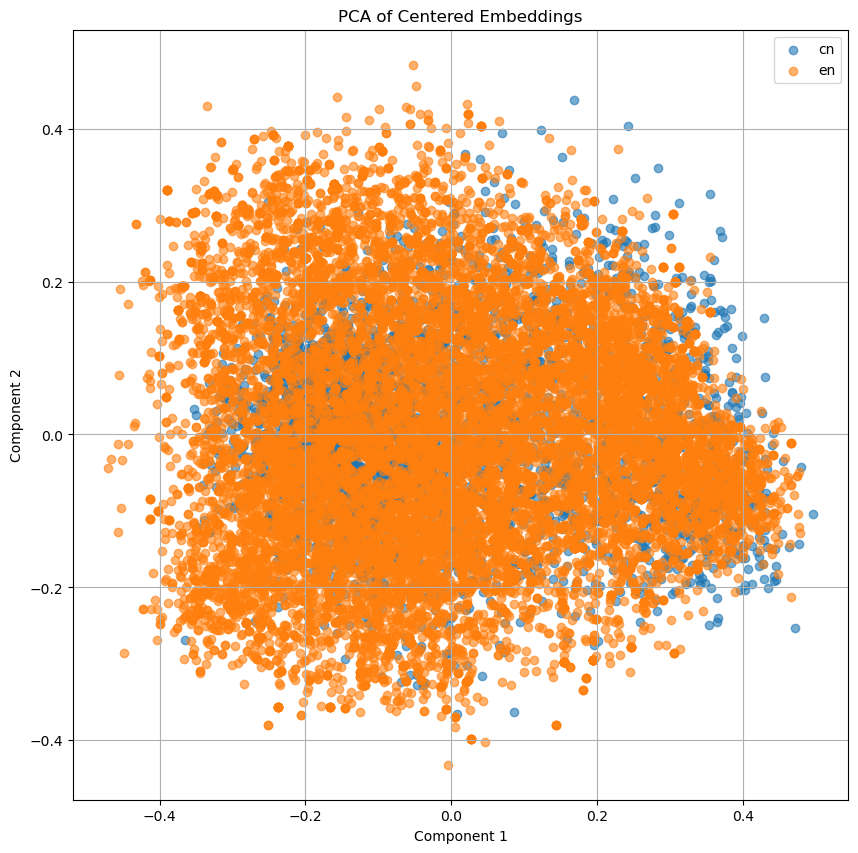

In [59]:
# PCA 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# create a dataframe with the embeddings
cn_centered_embeddings = cn_embeddings - np.mean(cn_embeddings, axis=0)
en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)

# 合并与标签
embeddings = np.concatenate([cn_centered_embeddings, en_centered_embeddings], axis=0)
labels = np.array(["cn"] * len(cn_centered_embeddings) + ["en"] * len(en_centered_embeddings))

# 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# 可视化
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.6)

plt.title("PCA of Centered Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

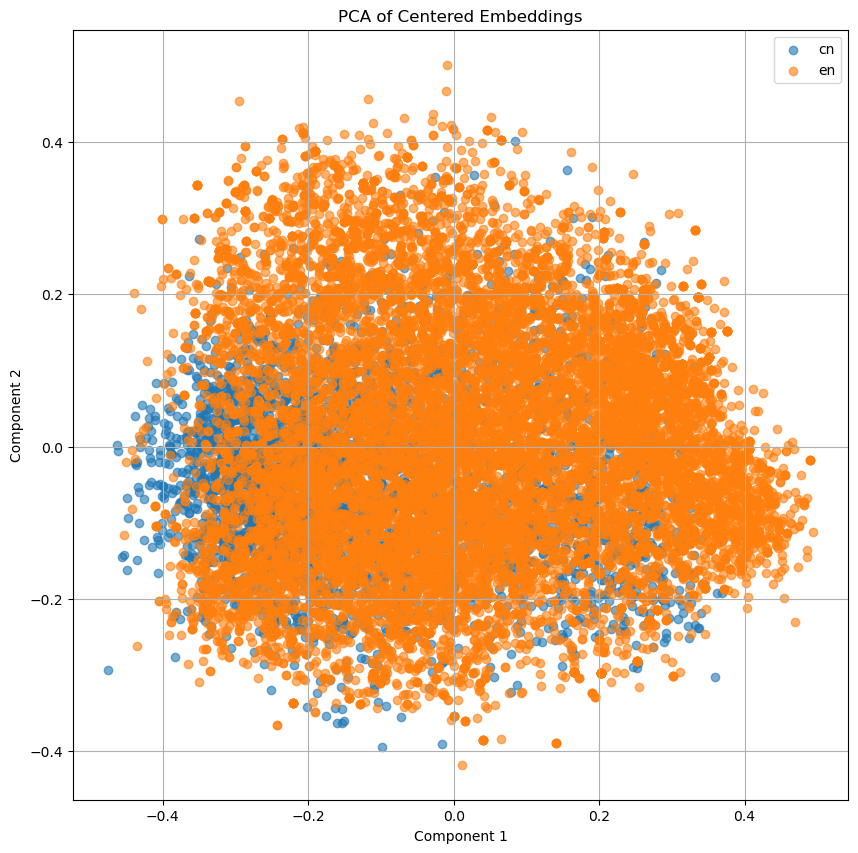

In [60]:
embeddings = np.concatenate([cn_embeddings, en_embeddings], axis=0)
labels = np.array(["cn"] * len(cn_centered_embeddings) + ["en"] * len(en_centered_embeddings))

# 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# 可视化
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.6)

plt.title("PCA of Centered Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
cnt = 0

cn_reviews = []
en_reviews = []
cn_en_reviews = []
for key, value in data.items():
    Western_reviews = value['Western_reviews']
    Chinese_reviews = value['Chinese reviews']
    for review in Chinese_reviews:
        cn_reviews.append(review['review'])
        if review['English review'] != None:
            cn_en_reviews.append(review['English review'])
    for review in Western_reviews:
        language = review['language']
        if language == 'en':
            en_reviews.append(review['review'])
    
    # cnt += 1
    # if cnt > 100:
    #     break

In [25]:
cn_embeddings = model.encode(cn_reviews, batch_size=64, show_progress_bar=True)
en_embeddings = model.encode(en_reviews, batch_size=64, show_progress_bar=True)
cn_en_embeddings = model.encode(cn_en_reviews, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/75 [00:00<?, ?it/s]

Batches:   0%|          | 0/262 [00:00<?, ?it/s]

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

In [26]:
# save embeddings
import numpy as np
np.save('cn_embeddings.npy', cn_embeddings)
np.save('en_embeddings.npy', en_embeddings)
np.save('cn_en_embeddings.npy', cn_en_embeddings)

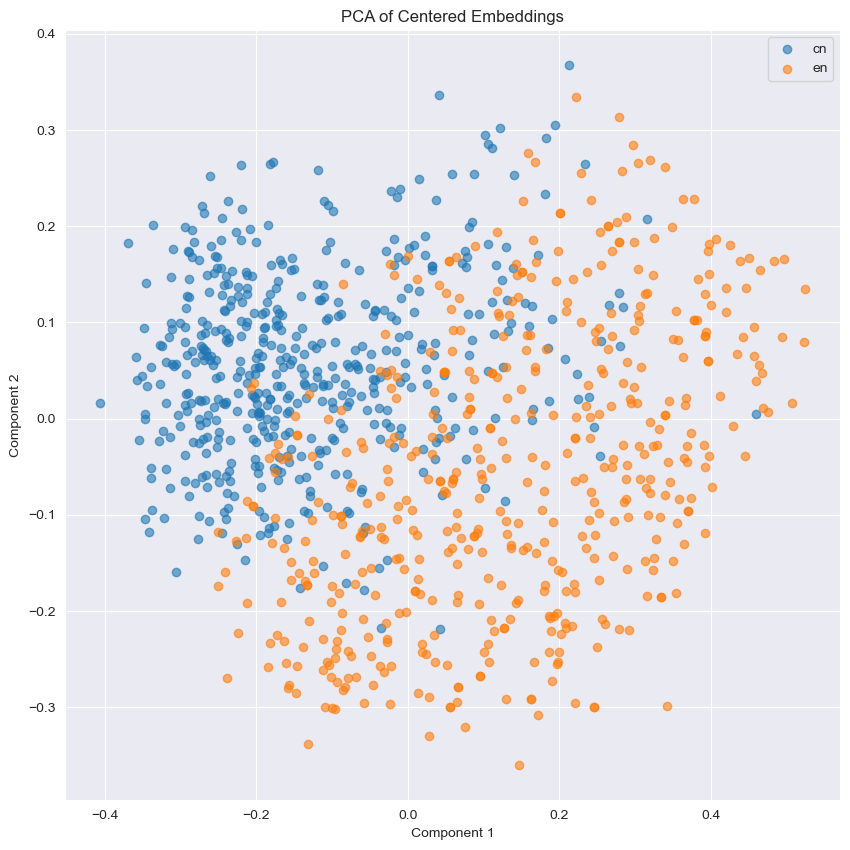

In [32]:
cn_centered_embeddings = cn_embeddings - np.mean(cn_embeddings, axis=0)
en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)
cn_en_centered_embeddings = cn_en_embeddings - np.mean(cn_en_embeddings, axis=0)

embeddings = np.concatenate([cn_en_embeddings[:500], en_embeddings[:500]], axis=0)
labels = np.array(["cn"] * 500 + ["en"] * 500)

# 降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# 可视化
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.6)

plt.title("PCA of Centered Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

/Users/ian_ye/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


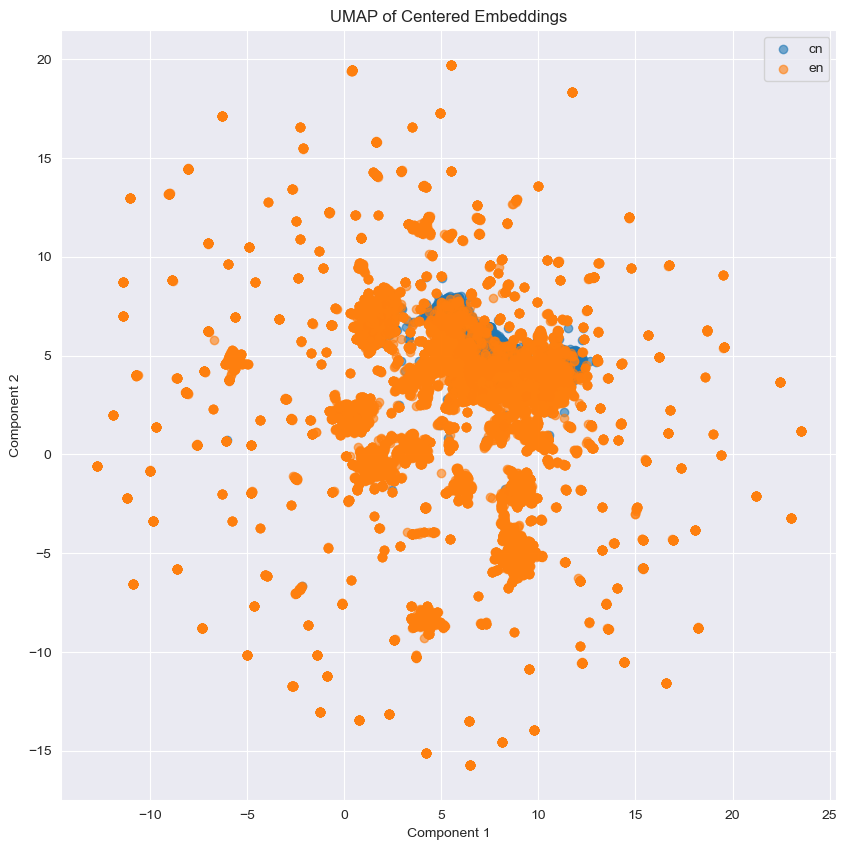

In [18]:
# umap
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

# create a dataframe with the embeddings
cn_centered_embeddings = cn_embeddings - np.mean(cn_embeddings, axis=0)
en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)
cn_en_centered_embeddings = cn_en_embeddings - np.mean(cn_en_embeddings, axis=0)

# 合并与标签
embeddings = np.concatenate([cn_centered_embeddings, en_centered_embeddings], axis=0)
labels = np.array(["cn"] * len(cn_centered_embeddings) + ["en"] * len(en_centered_embeddings))

# 降维
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(embeddings)
# 可视化
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, alpha=0.6)

plt.title("UMAP of Centered Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

/Users/ian_ye/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


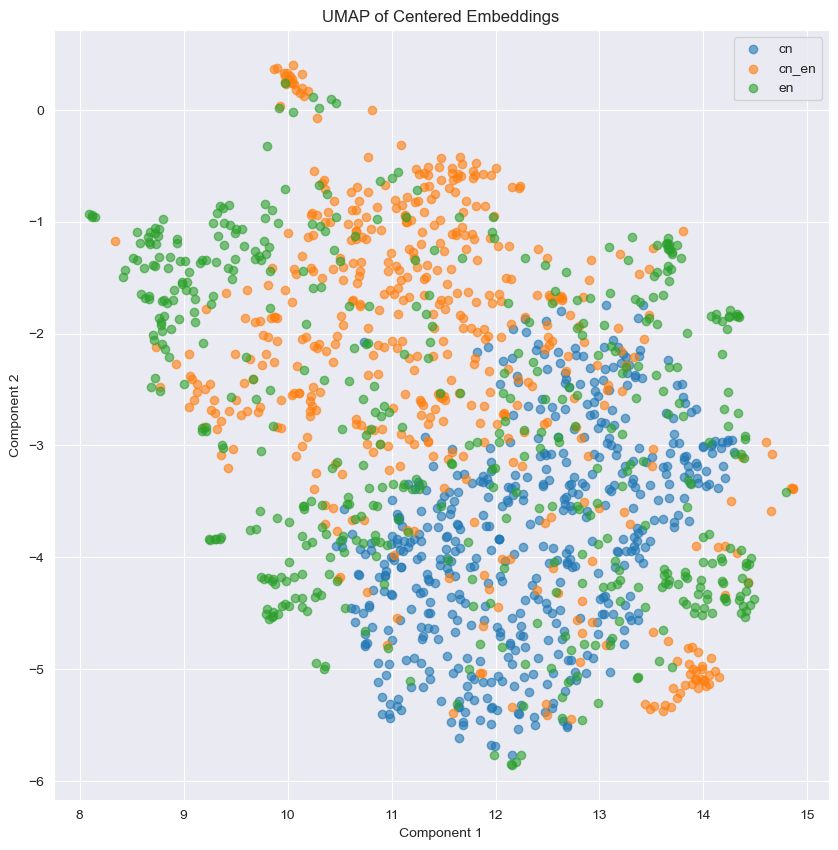

In [34]:
# select 500 samples from each language
cn_centered_embeddings = cn_embeddings[:500] - np.mean(cn_embeddings[:500], axis=0)
en_centered_embeddings = en_embeddings[:500] - np.mean(en_embeddings[:500], axis=0)
cn_en_centered_embeddings = cn_en_embeddings[:500] - np.mean(cn_en_embeddings[:500], axis=0)

# 合并与标签
embeddings = np.concatenate([cn_en_centered_embeddings[:500], en_centered_embeddings[:500], cn_centered_embeddings[:500]], axis=0)
labels = np.array(["cn_en"] * 500 + ["en"] * 500 + ["cn"] * 500)
# 降维
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(embeddings)
# 可视化
plt.figure(figsize=(10, 10))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, alpha=0.6)
plt.title("UMAP of Centered Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
emb_cn = np.load("cn_embeddings.npy")
emb_en = np.load("en_embeddings.npy")

labels = np.concatenate([np.zeros(len(emb_cn)), np.ones(len(emb_en))])
X_raw = np.vstack([emb_cn, emb_en])               # 未中心化
X_ctr = np.vstack([emb_cn - emb_cn.mean(0),       # 语言内中心化
                   emb_en - emb_en.mean(0)])


In [35]:
# np.save('cn_embeddings.npy', cn_embeddings)
# np.save('en_embeddings.npy', en_embeddings)
# np.save('cn_en_embeddings.npy', cn_en_embeddings)

import numpy as np
cn_embeddings = np.load('cn_embeddings.npy')
en_embeddings = np.load('en_embeddings.npy')
cn_en_embeddings = np.load('cn_en_embeddings.npy')

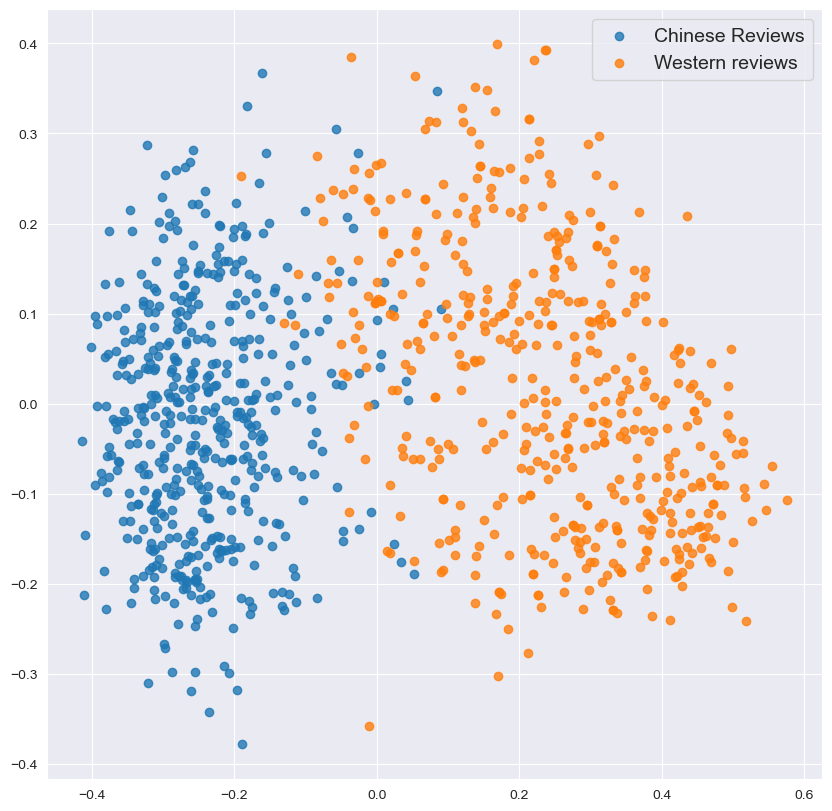

In [43]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# create a dataframe with the embeddings
cn_centered_embeddings = cn_embeddings - np.mean(cn_embeddings, axis=0)
en_centered_embeddings = en_embeddings - np.mean(en_embeddings, axis=0)
cn_en_centered_embeddings = cn_en_embeddings - np.mean(cn_en_embeddings, axis=0)

# 合并与标签
# embeddings = np.concatenate([cn_embeddings[:500], en_embeddings[:500]], axis=0)
# labels = np.array(["cn"] * 500 + ["en"] * 500)
# 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
# 可视化
plt.figure(figsize=(10, 10))

# 降维
embeddings = np.concatenate([cn_embeddings[:500], en_embeddings[:500]], axis=0)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
labels = np.array(["Chinese Reviews"] * 500 + ["Western reviews"] * 500)
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.8)
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# 设置其中字体大小

plt.legend(fontsize=14)
plt.grid(True)
plt.show()



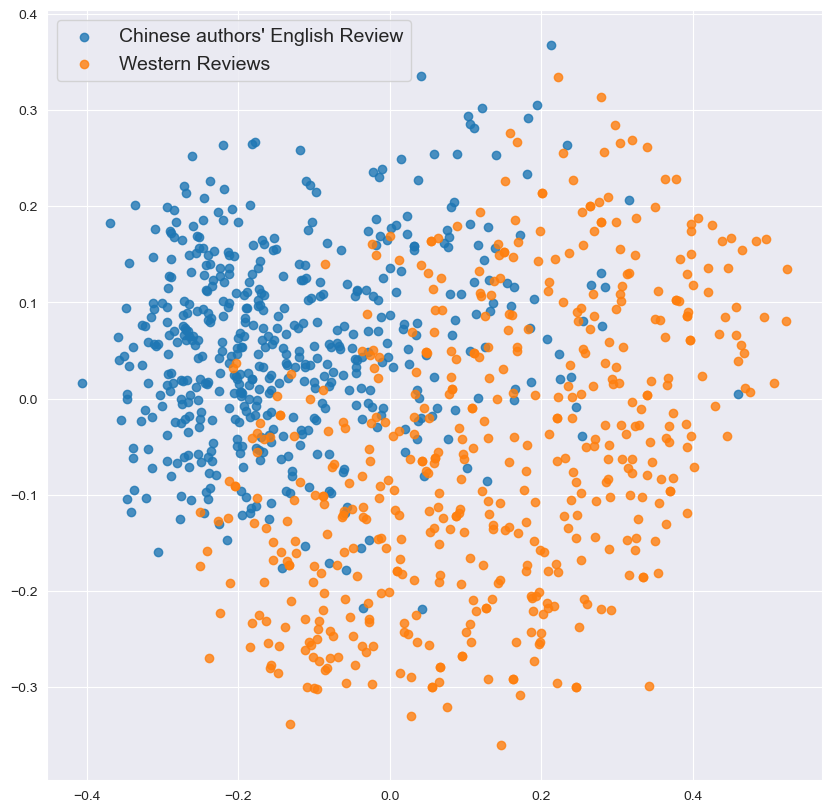

In [45]:
plt.figure(figsize=(10, 10))
embeddings = np.concatenate([cn_en_embeddings[:500], en_embeddings[:500]], axis=0)
# 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
labels = np.array(["Chinese authors' English Review"] * 500 + ["Western Reviews"] * 500)
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.8)

plt.legend(fontsize=14)
plt.grid(True)

plt.show()

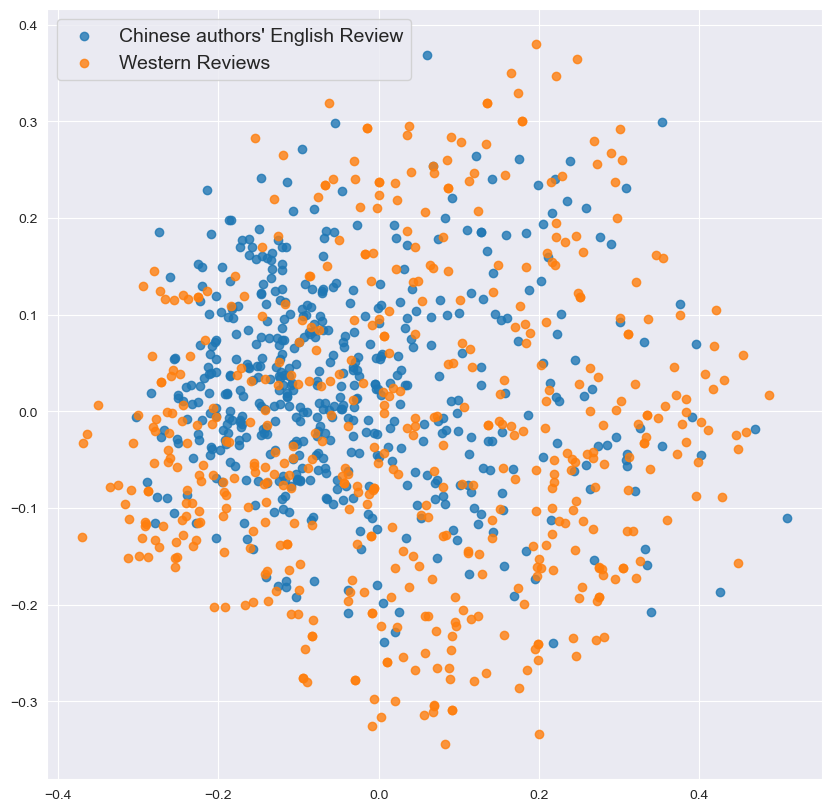

In [46]:
plt.figure(figsize=(10, 10))
embeddings = np.concatenate([cn_en_centered_embeddings[:500], en_centered_embeddings[:500]], axis=0)

# 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
labels = np.array(["Chinese authors' English Review"] * 500 + ["Western Reviews"] * 500)
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=label, alpha=0.8)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()
